### The Hello world of Deep Learning
Let us write the hello world of Deep learning. The MNIST Number classification

In [1]:
## Imports
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


/Users/sougatabhattacharya/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Constants Declarations
BATCH_SIZE = 128
EPOCH = 10
NO_CLASSES = 10
IMAGE_HEIGHT,IMAGE_WIDTH = 28,28
INPUT_SHAPE=(IMAGE_HEIGHT,IMAGE_WIDTH,1)

In [3]:
## Let us load the dataset from MINIST using load_data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
## Lets see the dimensions, we should have 60K images of 28x28 pixel
train_images.shape

(60000, 28, 28)

In [5]:
##test Images should be 10K
test_images.shape

(10000, 28, 28)

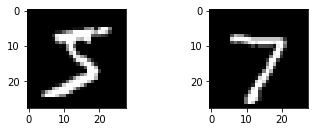

In [6]:
## Let us plot one image from train set and one from test set
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(test_images[0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [7]:
## Lets see the Labels
print(train_labels[0])
print(test_labels[0])

5
7


In [8]:
### Lets see the data, this is a 2D array of 28x28 dimension value ranges for 0 to 255
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Reshape the vector into am imare format and define the input dimension for convolution 

In [9]:
### Train images should be of dimension 60kX28x28x1
train_images = train_images.reshape(train_images.shape[0],IMAGE_HEIGHT,IMAGE_WIDTH,1)

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [11]:
### Test images should be of dimension 10kX28x28x1
test_images = test_images.reshape(test_images.shape[0],IMAGE_HEIGHT,IMAGE_WIDTH,1)

In [12]:
test_images.shape

(10000, 28, 28, 1)

In [13]:
### Convert to floating Value
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

### Normalize the data

In [14]:
train_images = train_images/255
test_images = test_images/255

In [15]:
## Lets see the labels
train_labels[0]

5

#### Convert label that to one hot encoding vector

In [16]:
train_labels = tf.keras.utils.to_categorical(train_labels,NO_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels,NO_CLASSES)

In [17]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Model building

In [18]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.3))
    model.add(Flatten())
    model.add(Dense(units=1024,activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(units=NO_CLASSES,activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
    return model

In [19]:
cnn_model = build_model(INPUT_SHAPE)

In [20]:
## So we got the model now lets see the sumamry
cnn_model.summary()
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              18875392  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

In [23]:
## Lets train
cnn_model.fit(train_images,train_labels,epochs=EPOCH, batch_size=BATCH_SIZE,validation_data=(test_images,test_labels),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 482s 8ms/step - loss: 0.1247 - acc: 0.9608 - val_loss: 0.0369 - val_acc: 0.9887
Epoch 2/10
60000/60000 [==============================] - 4729s 79ms/step - loss: 0.0385 - acc: 0.9879 - val_loss: 0.0312 - val_acc: 0.9901
Epoch 3/10
60000/60000 [==============================] - 5358s 89ms/step - loss: 0.0263 - acc: 0.9923 - val_loss: 0.0281 - val_acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 508s 8ms/step - loss: 0.0176 - acc: 0.9940 - val_loss: 0.0316 - val_acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 714s 12ms/step - loss: 0.0142 - acc: 0.9954 - val_loss: 0.0306 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 1012s 17ms/step - loss: 0.0129 - acc: 0.9957 - val_loss: 0.0293 - val_acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 783s 13ms/step - loss: 0.0114 - acc: 0.9963 - val_loss: 0